<a href="https://colab.research.google.com/github/mcmaharrey/MLA_MCM/blob/main/MLA5_MCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Matthew Maharrey <br>
CS430-ON <br>
Assignment 4**

**Imports for specific models**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def plot_cm(y_test, y_pred):
  cm = confusion_matrix(y_test,y_pred)
  fig = plt.figure(figsize=(10,10))
  heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')

**Acquire Data**

In [ ]:
train_file_path = "/content/gdrive/MyDrive/CS430/landsat_train.csv"
test_file_path = "/content/gdrive/MyDrive/CS430/landsat_test.csv"

landsat_train = pd.read_csv(train_file_path)
landsat_test = pd.read_csv(test_file_path)

**Statistics and Visual Exploration**

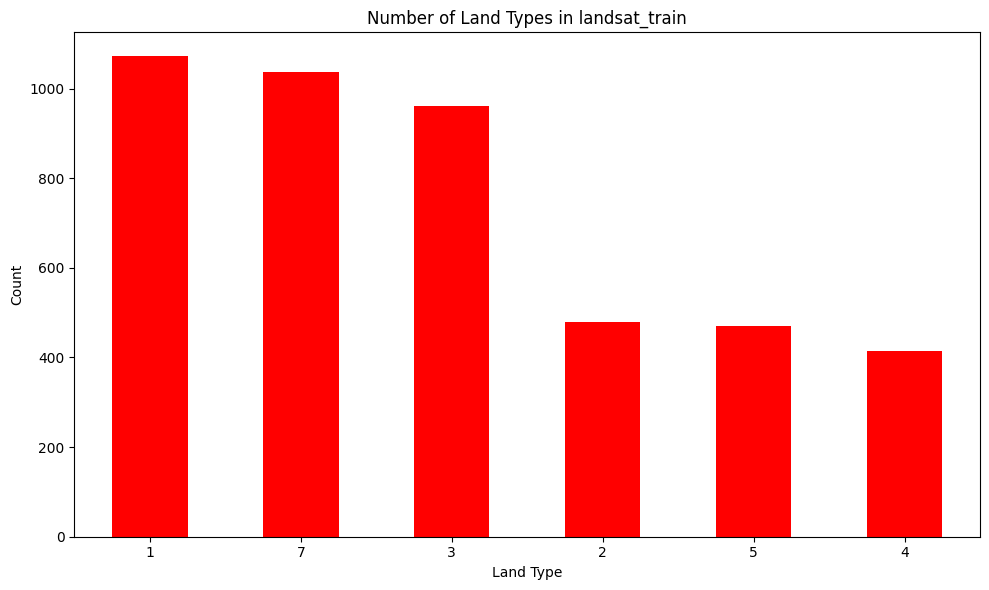

In [ ]:
plt.figure(figsize=(10, 6))
landsat_train['land_type'].value_counts().plot(kind='bar', color='red')
plt.title('Number of Land Types in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

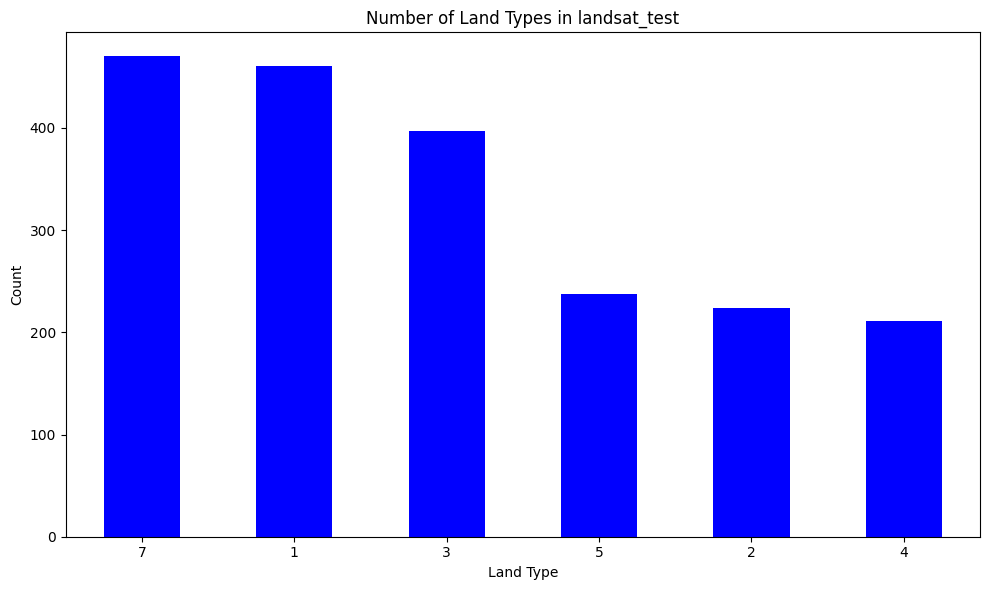

In [ ]:
plt.figure(figsize=(10, 6))
landsat_test['land_type'].value_counts().plot(kind='bar', color='blue')
plt.title('Number of Land Types in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Splitting Data into Train/Test**

In [ ]:
X_train = landsat_train.drop(columns=['land_type'])

X_test = landsat_test.drop(columns=['land_type'])

y_train = landsat_train[['land_type']]

y_test = landsat_test[['land_type']]

**Building the Pipeline**

In [ ]:

column_transformer = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('transform', column_transformer),
    ('random_forest', RandomForestClassifier())
])

y_train = y_train.values.ravel()

pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('random_forest', RandomForestClassifier())])

**Evaluating the Model**

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       461
           2       0.97      0.97      0.97       224
           3       0.89      0.95      0.92       397
           4       0.76      0.63      0.69       211
           5       0.93      0.89      0.91       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.91      0.91      2000



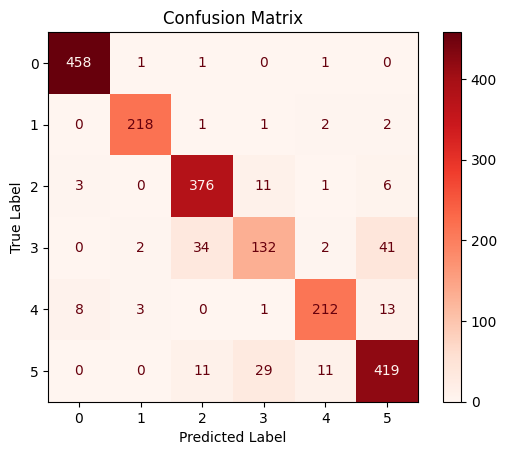

In [ ]:
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(len(cm)))
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Conclusion**

The RandomForest model shows good prefromance for predicting the land types. <br>
The data shows a high precision, recall, and f1 score and the ability to <br>
classify the different land cover types. <br>
There was a small dip in the scores for class 4 when compairing to the other classes. <br>
But there is an overall accuacy of 91% which makes me think this model would be good to use.

**Problem 2**

**Building the Pipeline**

In [ ]:
column_transformer = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
      ('transform', column_transformer),
      ('ada_boost', AdaBoostClassifier())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('ada_boost', AdaBoostClassifier())])

**Evaluating the Model**

              precision    recall  f1-score   support

           1       0.94      0.76      0.84       461
           2       0.60      0.96      0.74       224
           3       0.77      0.67      0.72       397
           4       0.43      0.77      0.55       211
           5       0.42      0.20      0.27       237
           7       0.79      0.74      0.76       470

    accuracy                           0.69      2000
   macro avg       0.66      0.68      0.65      2000
weighted avg       0.72      0.69      0.69      2000



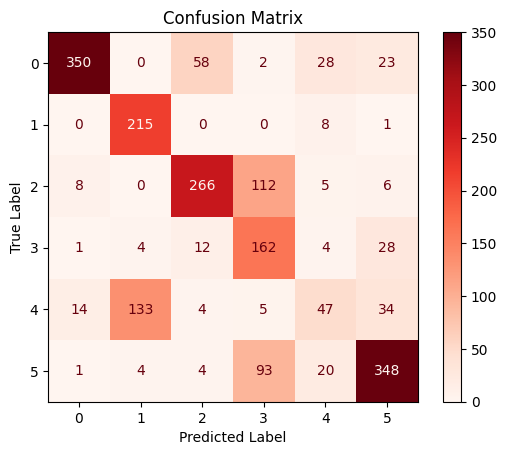

In [ ]:
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Conclusion**

I feel that the AdaBoostClassfier is not suitable for predicting the land types. <br>
While there were a few instances where the percision and recall were in the 90% range. <br>
Most if not all of the remaning percision, recall and f1 scores were in the 70s or lower. <br>
The model had an average accuracy of 69% and to me this is not enough to strongly suggest this model.



**Problem 3**

**Imports**

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/CS430/banknote_authentication.csv")

**Splitting Data into Train/Test**

In [ ]:
X = df.drop(columns=['forgery'])

y = df[['forgery']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1097, 4)
X_test shape: (275, 4)
y_train shape: (1097, 1)
y_test shape: (275, 1)


**Building the Pipeline**

In [ ]:
numerical_indices = X.select_dtypes(include=['float64', 'int64']).columns

column_transformer = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_indices)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('transform', column_transformer),
    ('random_forest', RandomForestClassifier())
])


**Executing the Model**

In [ ]:
y_train = y_train.ravel()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('random_forest', RandomForestClassifier())])

**Evaluating the Model**

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



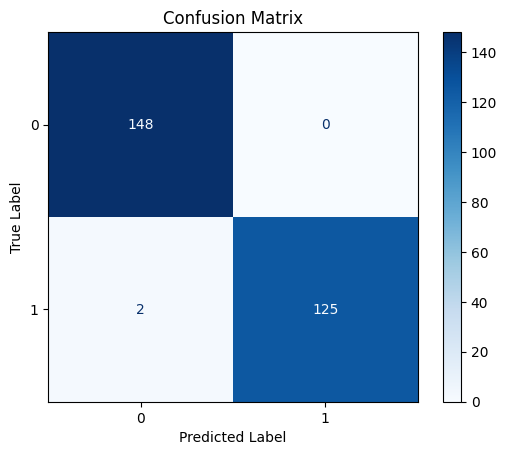

In [ ]:
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Conclusion**

The data shows that using the RandomForest for the banknote data set proved to be very accurate.<br>
The precision, recall, and f1 scores are all 98% or above. <br>
